# Nikshay Jain - MM21B044

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

c:\Users\Nikshay Jain\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
columns = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "class"]
data = pd.read_csv('nursery.data',names=columns)
data

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [3]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['class'])

## Decision tree - categorical features

In [4]:
# Convert categorical columns to indices (integer-based for HistGradientBoosting)
X = data.drop(columns=["class"])

# Convert categorical columns to indices
for col in X.columns:
    X[col] = pd.Categorical(X[col]).codes

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

In [5]:
hgb_params = {
    'max_iter': [100, 300],
    'learning_rate': [0.1, 0.2, 0.5],
    'max_depth': [2, 3, 5],
    'min_samples_leaf': [1, 2],
}

# HistGradientBoostingClassifier with categorical support
categorical_features = np.arange(X_train.shape[1])
clf_hgb = HistGradientBoostingClassifier(categorical_features=categorical_features, random_state=42)
clf_hgb = GridSearchCV(clf_hgb, hgb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
clf_hgb.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters for categorical fetaures in Decision tree: {clf_hgb.best_params_}")

# Evaluate the model
y_val_pred_hgb = clf_hgb.predict(X_val)
hgb_acc = accuracy_score(y_val, y_val_pred_hgb)
print(f"Decision Tree (Categorical Features) Val Accuracy: {hgb_acc}")

# Evaluate on test set
y_test_pred_hgb = clf_hgb.predict(X_test)
test_acc_hgb = accuracy_score(y_test, y_test_pred_hgb)
print(f"Decision Tree (Categorical Features) Test Accuracy: {test_acc_hgb}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for categorical fetaures in Decision tree: {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 300, 'min_samples_leaf': 1}
Decision Tree (Categorical Features) Val Accuracy: 1.0
Decision Tree (Categorical Features) Test Accuracy: 0.9993141289437586


## Decision tree - one hot encoding

In [6]:
X = data.drop(columns=["class"])

# One hot encoding for features
ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(X)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

c:\Users\Nikshay Jain\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
dt_params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [1, 2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Decision Tree on One-Hot Encoded Data
clf_dt_onehot = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
clf_dt_onehot.fit(X_train, y_train)
print(f"Best Decision Tree (One-Hot) Params: {clf_dt_onehot.best_params_}")

y_val_pred_dt = clf_dt_onehot.predict(X_val)
dt_val_acc = accuracy_score(y_val, y_val_pred_dt)
print(f"Decision Tree (One-Hot Encoded) Val Accuracy: {dt_val_acc}")

y_test_pred_dt = clf_dt_onehot.predict(X_test)
dt_test_acc = accuracy_score(y_test, y_test_pred_dt)
print(f"Decision Tree (One-Hot Encoded) Test Accuracy: {dt_test_acc}")

Best Decision Tree (One-Hot) Params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 1}
Decision Tree (One-Hot Encoded) Val Accuracy: 0.9969135802469136
Decision Tree (One-Hot Encoded) Test Accuracy: 0.9948559670781894


## Logistic Regression

In [8]:
logreg_params = {
    'C': [1, 10, 100],
    'solver': ['liblinear'],
    'max_iter': [50, 100, 200]
}
clf_lr = GridSearchCV(LogisticRegression(penalty='l1', random_state=42), logreg_params, cv=5)
clf_lr.fit(X_train, y_train)

y_val_pred_lr = clf_lr.predict(X_val)
lr_val_acc = accuracy_score(y_val, y_val_pred_lr)

print(f"Best Logistic Regression Params: {clf_lr.best_params_}")
print(f"Logistic Regr (L1 Regularization) Val Accuracy: {lr_val_acc}")

y_test_pred_lr = clf_lr.predict(X_test)
lr_test_acc = accuracy_score(y_test, y_test_pred_lr)
print(f"Logistic Regr (L1 Regularization) Test Accuracy: {lr_test_acc}")

Best Logistic Regression Params: {'C': 100, 'max_iter': 50, 'solver': 'liblinear'}
Logistic Regr (L1 Regularization) Val Accuracy: 0.9022633744855967
Logistic Regr (L1 Regularization) Test Accuracy: 0.9245541838134431


## K Nearest Neighbours

In [9]:
# k-Nearest Neighbors (kNN)
clf_knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 7, 11, 15],
                  'weights': ['uniform', 'distance']
}
grid_search_knn = GridSearchCV(clf_knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

print(f"Best kNN Params: {grid_search_knn.best_params_}")

y_val_pred_knn = grid_search_knn.predict(X_val)
knn_val_acc = accuracy_score(y_val, y_val_pred_knn)
print(f"k-Nearest Neighbors Val Accuracy: {knn_val_acc}")

y_test_pred_knn = grid_search_knn.predict(X_test)
knn_test_acc = accuracy_score(y_test, y_test_pred_knn)
print(f"k-Nearest Neighbors Test Accuracy: {knn_test_acc}")

Best kNN Params: {'n_neighbors': 11, 'weights': 'distance'}
k-Nearest Neighbors Val Accuracy: 0.9526748971193416
k-Nearest Neighbors Test Accuracy: 0.9639917695473251


c:\Users\Nikshay Jain\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Nikshay Jain\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Nikshay Jain\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Nikshay Jain\AppData\Local\Programs\Python\Python38\lib\site-pac

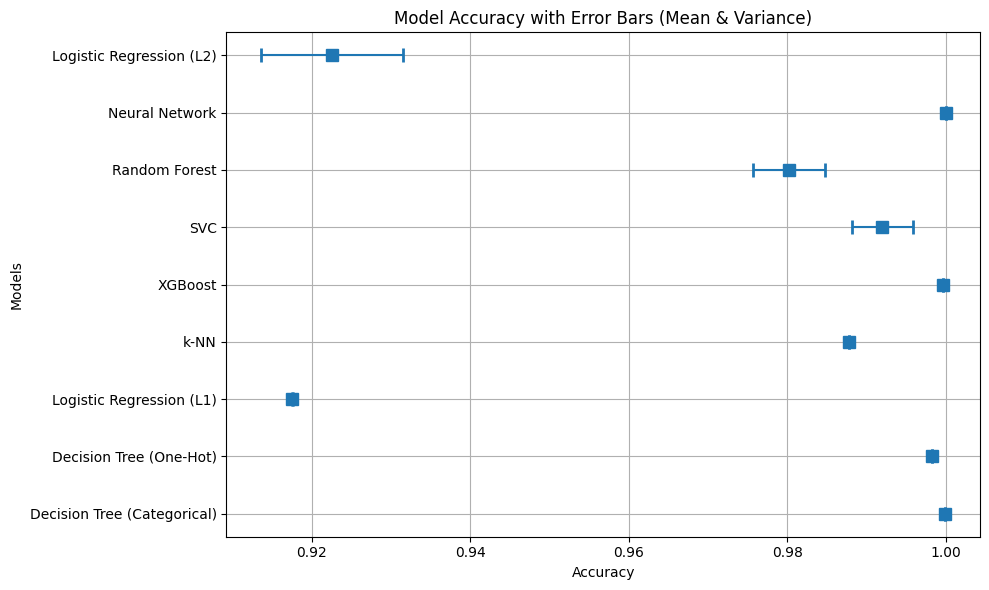

In [10]:
n_repeats = 5
methods = ['Decision Tree (Categorical)', 'Decision Tree (One-Hot)', 'Logistic Regression (L1)', 'k-NN']
accuracies = {method: [] for method in methods}

for _ in range(n_repeats):
    X = data.drop(columns=["class"])

    # Convert categorical columns to indices
    for col in X.columns:
        X[col] = pd.Categorical(X[col]).codes
        
    X_train_temp, X_val_temp, y_train_temp, y_val_temp = train_test_split(X, y, test_size=0.1)

    y_val_pred_dt_cat = clf_hgb.predict(X_val_temp)
    accuracies['Decision Tree (Categorical)'].append(accuracy_score(y_val_temp, y_val_pred_dt_cat))

    # One hot encoded
    X = data.drop(columns=["class"])
    X = ohe.fit_transform(X)
    
    X_train_temp1, X_val_temp1, y_train_temp1, y_val_temp1 = train_test_split(X, y, test_size=0.1)

    y_val_pred_dt_oh = clf_dt_onehot.predict(X_val_temp1)
    accuracies['Decision Tree (One-Hot)'].append(accuracy_score(y_val_temp1, y_val_pred_dt_oh))

    y_val_pred_lr = clf_lr.predict(X_val_temp1)
    accuracies['Logistic Regression (L1)'].append(accuracy_score(y_val_temp1, y_val_pred_lr))

    y_val_pred_knn = grid_search_knn.predict(X_val_temp1)
    accuracies['k-NN'].append(accuracy_score(y_val_temp1, y_val_pred_knn))

# Calculate mean and variance of accuracies
mean_accuracies = {method: np.mean(accuracies[method]) for method in methods}
var_accuracies = {method: np.var(accuracies[method]) for method in methods}

# Visualization
x = np.arange(len(methods))
means = [mean_accuracies[method] for method in methods]
variances = [var_accuracies[method] for method in methods]

# extracted from the website of the database
additional_methods = ['XGBoost', 'SVC', 'Random Forest', 'Neural Network', 'Logistic Regression (L2)']
additional_means = [0.99969, 0.99198, 0.98025, 1.0, 0.92253]
additional_vars = [0.00001, 0.00385, 0.00453, 0, 0.00895]

methods.extend(additional_methods)
means = [mean_accuracies[method] for method in mean_accuracies] + additional_means
variances = [var_accuracies[method] for method in var_accuracies] + additional_vars

plt.figure(figsize=(10, 6))
plt.errorbar(means, methods, xerr=variances, fmt='o', capsize=5, capthick=2, marker='s', markersize=8, label='Mean Accuracy')

# Adding labels and title
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Model Accuracy with Error Bars (Mean & Variance)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Task 2

In [11]:
# Unipolar sigmoid
def unipolar_sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Bipolar sigmoid using unipolar sigmoid
def bipolar_sigmoid(x, a=1):
    return 2 * unipolar_sigmoid(a * x) - 1

def tanh_bipolar_sigmoid(x, a=1):
    return np.tanh(a * x)

a_values = [-5, -1, -0.1, -0.01, 0.001, 0.01, 0.1, 1, 5]
x = np.linspace(-10, 10, 400)

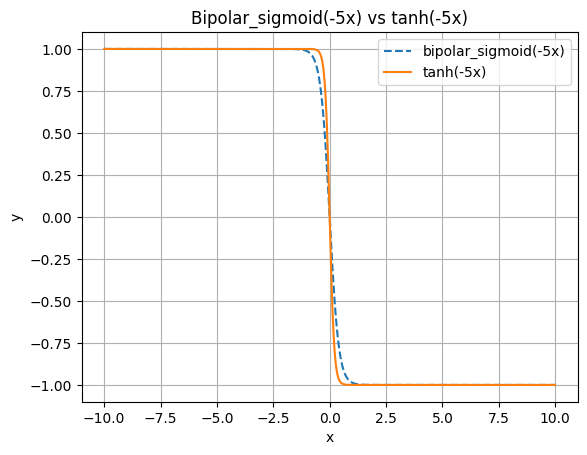

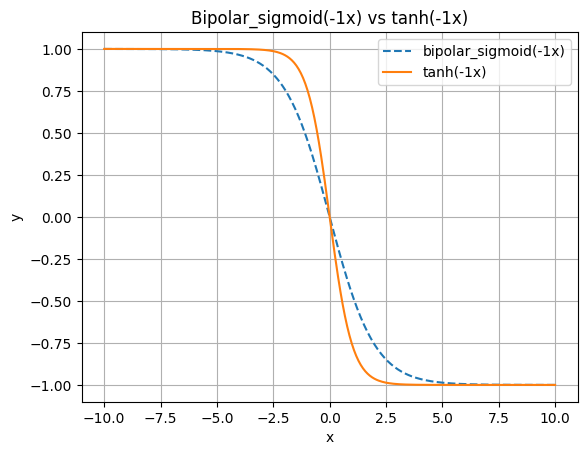

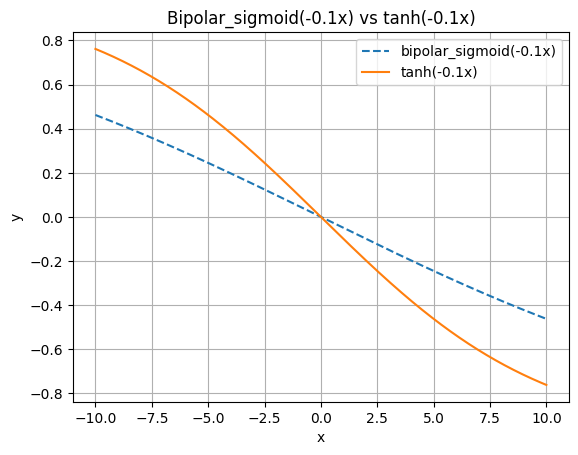

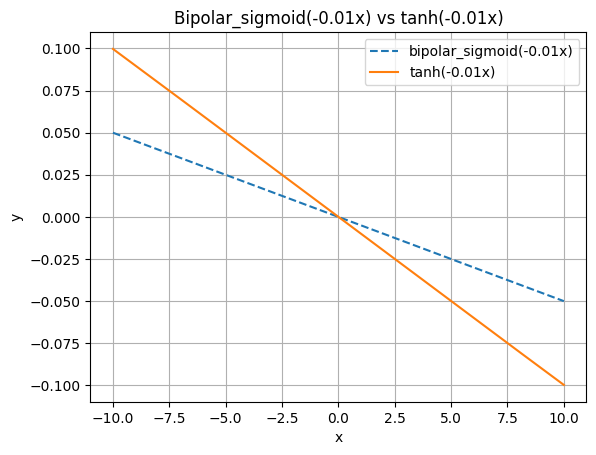

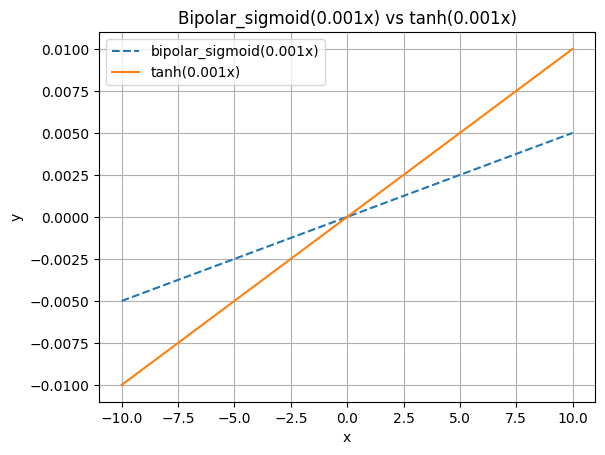

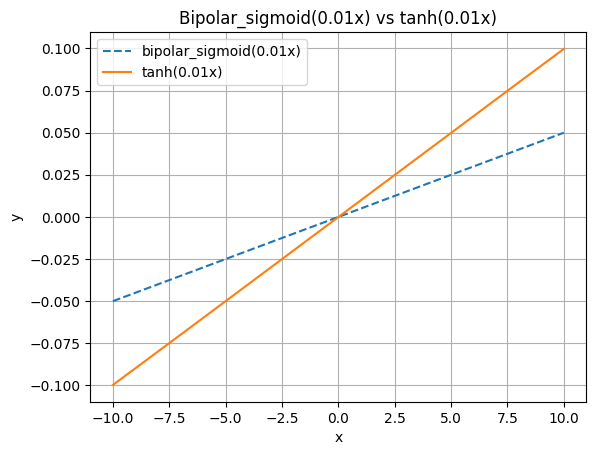

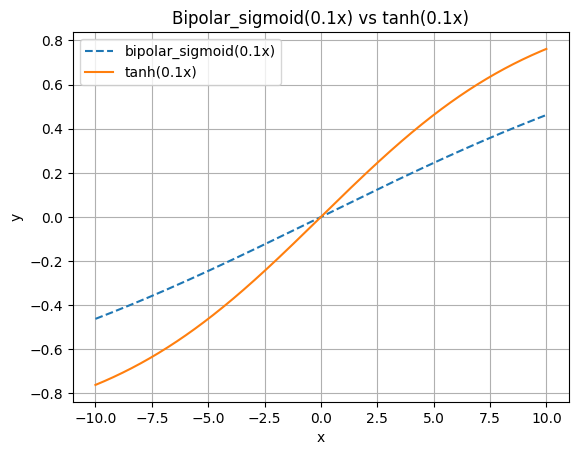

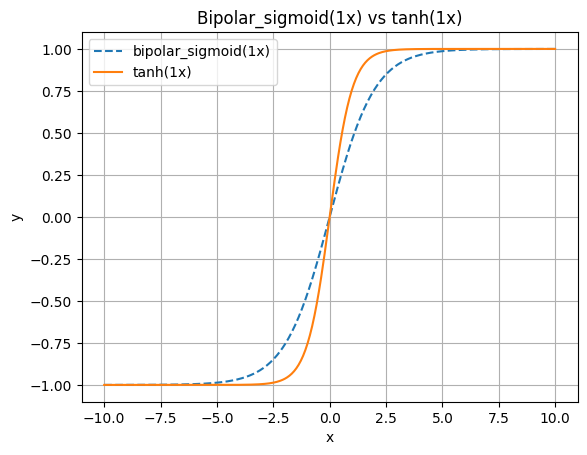

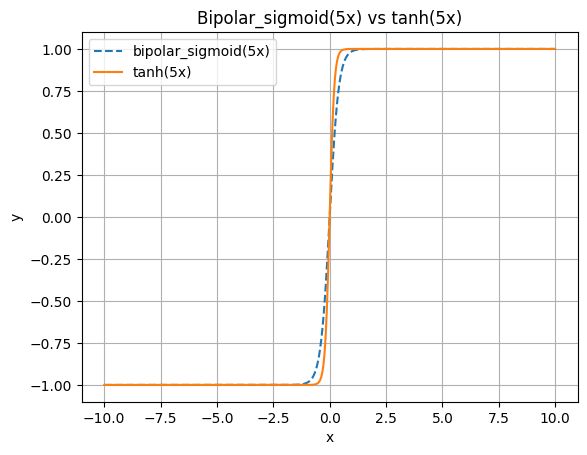

In [12]:
# Plotting the response curves for different 'a' values
for a in a_values:
    y_bipolar = bipolar_sigmoid(x, a)
    y_tanh = tanh_bipolar_sigmoid(x, a)
    
    plt.plot(x, y_bipolar, label=f'bipolar_sigmoid({a}x)', linestyle='--')
    plt.plot(x, y_tanh, label=f'tanh({a}x)', linestyle='-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Bipolar_sigmoid({a}x) vs tanh({a}x)')
    plt.legend()
    plt.grid(True)
    plt.show()

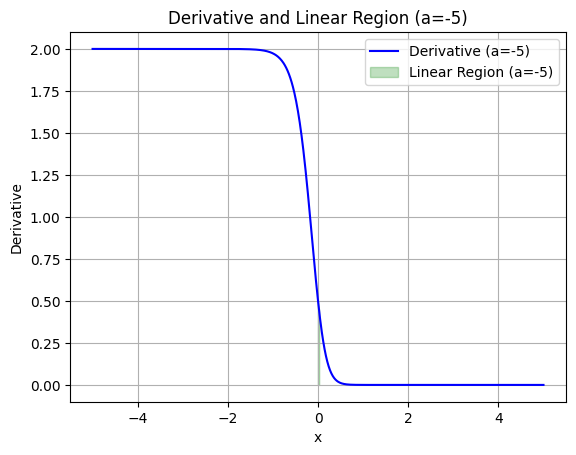

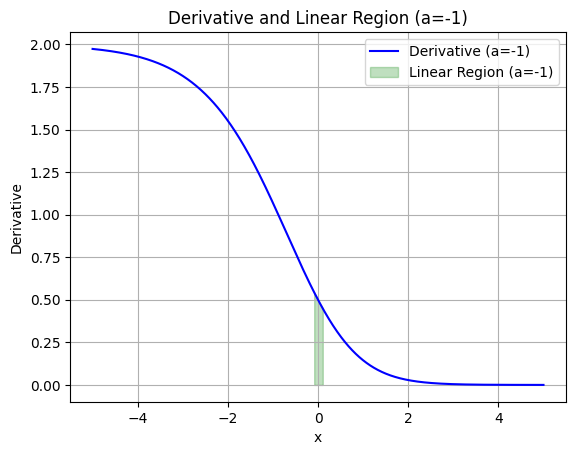

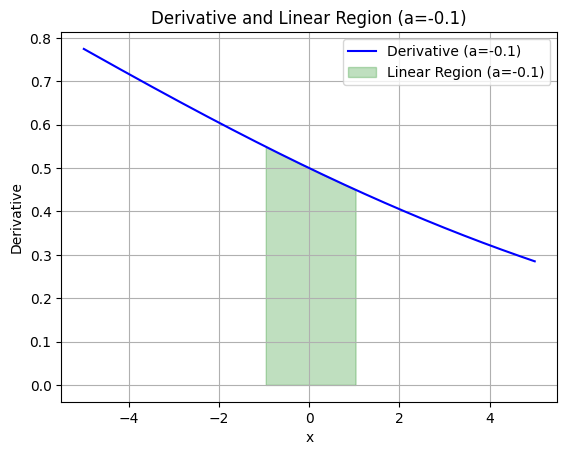

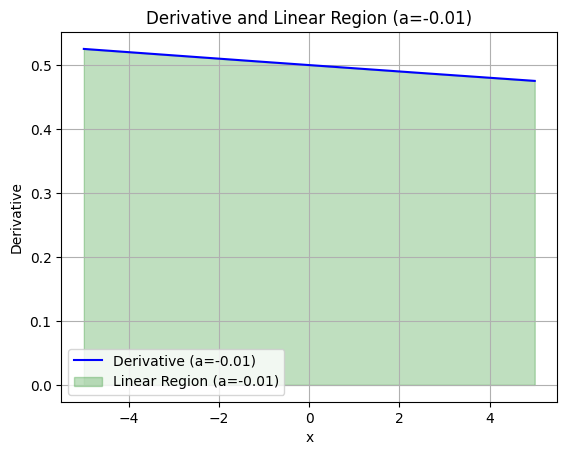

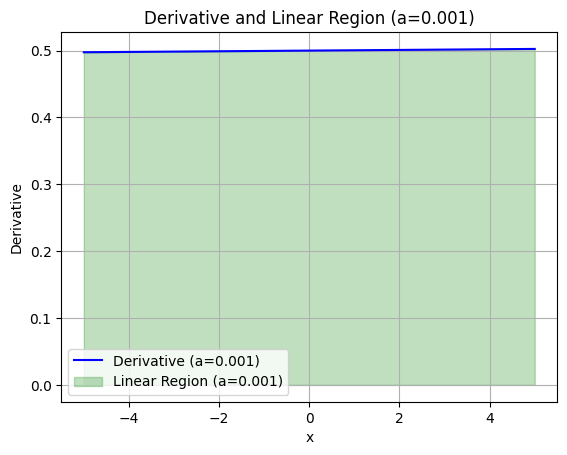

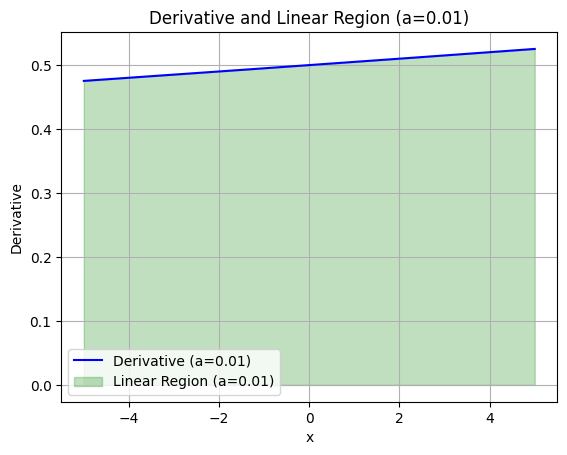

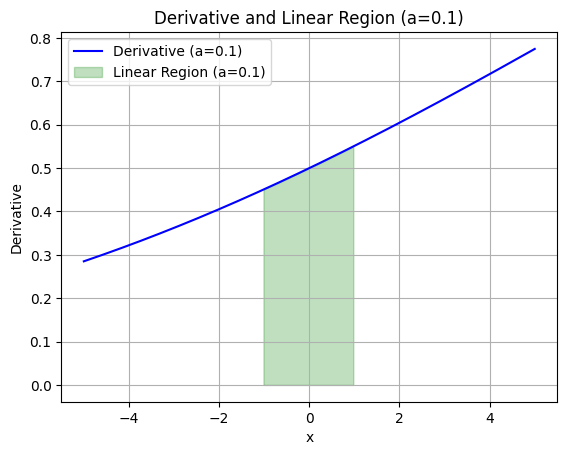

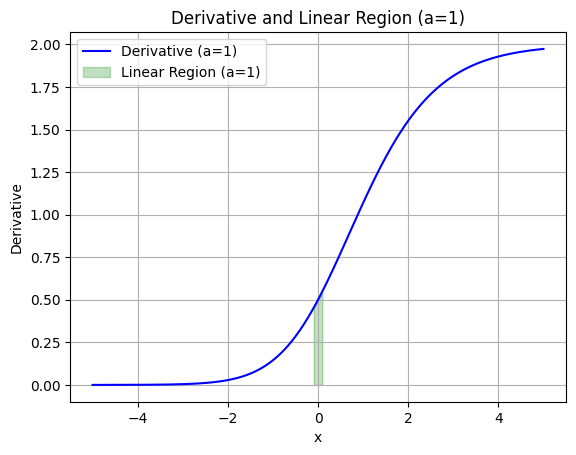

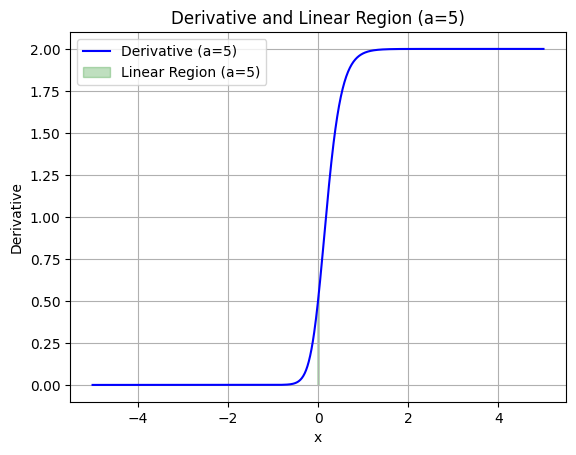

In [83]:
# Derivative of bipolar sigmoid
def bipolar_sigmoid_derivative(x):
    return ((1 + bipolar_sigmoid(x))**2) / 2

thresh=0.05
x = np.linspace(-5, 5, 1000)

for a in a_values:
    # Compute the derivative of bipolar sigmoid(ax)
    derivative = bipolar_sigmoid_derivative(a*x)
    
    # Calculate where the derivative is approximately constant (linear region)
    center_derivative = derivative[len(derivative) // 2]
    linear_region = np.abs(derivative - center_derivative) < thresh
    
    # Create a new figure for each value of 'a' and plot the bipolar sigmoid derivative and linear region
    plt.plot(x, derivative, label=f'Derivative (a={a})', color='blue')
    plt.fill_between(x, derivative, where=linear_region, color='blue', alpha=0.25, label=f'Linear Region (a={a})')
    plt.title(f'Derivative and Linear Region (a={a})')
    plt.xlabel('x')
    plt.ylabel('Derivative')
    plt.legend()
    plt.grid(True)
    plt.show()